# Session 1.1 - Simple Linear Regression

In [1]:
%pylab inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import IPython
import platform

from sklearn import preprocessing

print ('Python version:', platform.python_version())
print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sklearn.__version__)
print ('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
Python version: 3.6.8
IPython version: 6.2.1
numpy version: 1.13.3
scikit-learn version: 0.19.1
matplotlib version: 2.1.0


In [89]:
from sklearn import datasets
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target
y_labels = iris.target_names

print("Data shape={}, type={}, labels={}\n".format(X_iris.shape, type(X_iris), iris.feature_names))
print("Target shape={}, type={}, labels={}".format(y_iris.shape, type(y_iris), y_labels))

Data shape=(150, 4), type=<class 'numpy.ndarray'>, labels=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target shape=(150,), type=<class 'numpy.ndarray'>, labels=['setosa' 'versicolor' 'virginica']


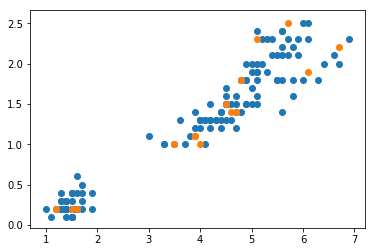

In [174]:
iris_sepal = X_iris[:,2:4]
# setosa_sepal =iris_sepal[y_iris == 0]

X = iris_sepal[:,0].reshape(-1,1)
y = iris_sepal[:,1]

numpy.random.seed(666)
test_split = 0.1
test_n = int(test_split*len(X))
test_indices = numpy.random.randint(0,len(X), size=test_n)
train_indices = sorted(set(range(len(X))) - set(test_indices))

X_train  = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices] 
y_test = y[test_indices]

# convenience class to do the above...
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=666)

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test) #it's sneaky to look at your test data!
plt.legend()
plt.show()

In [175]:
def my_linear_regression(xs,ys, n_iter=1000):
    N = len(xs)
    m = 0.0
    b = 0.0
    learning_rate_alpha = 0.001

    for i in range(n_iter):
        cost = 0
        y_hats = []
        for x in xs:
            y_hats.append( b + m*x )
        
        for x,y,y_hat in zip(xs,ys,y_hats):
            cost += (y_hat- y)**2
        if i % 100 == 0:
            print("cost at iteration {} = {}".format(i,cost))

        del_m = 0.0
        del_b = 0.0    
        for x,y,y_hat in zip(xs,ys,y_hats):  
            del_m += (1/N)*( 2*x * (y_hat - y) )
            del_b += (1/N)*( 2   * (y_hat - y) )
            
        m = m - learning_rate_alpha * del_m
        b = b - learning_rate_alpha * del_b
    return y_hats, m, b, cost

cost at iteration 0 = [ 269.57]
m= [ 0.3145] b= [ 0.0541]
cost= [ 10.0173]


/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


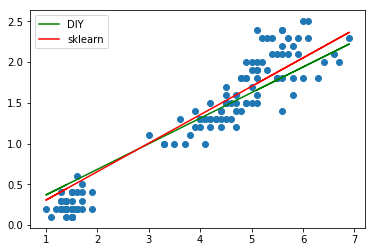

In [179]:
from sklearn.linear_model import SGDRegressor

diy_y_hats, m, b, cost = my_linear_regression(X_train, y_train, n_iter=100)
print("m=",m,"b=",b)
print("cost=",cost)

reg = SGDRegressor()

reg.fit(X_train,y_train)
y_hats = reg.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, diy_y_hats, color="green", label="DIY")
plt.plot(X_train, y_hats, color="red", label="sklearn")
plt.legend()
plt.show()

In [177]:
from sklearn import metrics
y_hats = reg.predict(X_train)

print("RMSE is", sqrt(metrics.mean_squared_error(y_train,y_hats)))

R2_1 = reg.score(X_train,y_train)
print("R2 from estimator is:", R2_1)
R2_2 = metrics.r2_score(y_train,y_hats)
print("R2 from metrics is:", R2_2)
R2_3 = metrics.explained_variance_score(y_train,y_hats)
print("Variance explained from metrics is:", R2_3)

RMSE is 0.244319679868
R2 from estimator is: 0.896896411102
R2 from metrics is: 0.896896411102
Variance explained from metrics is: 0.909828623524


In [178]:
y_hats = reg.predict(X_test)

print("RMSE is", sqrt(metrics.mean_squared_error(y_test,y_hats)))
R2_2 = metrics.r2_score(y_test,y_hats)
print("R2 from metrics is:", R2_2)

RMSE is 0.287639186477
R2 from metrics is: 0.840973279862


## Summary
- We loaded the Iris dataset and manually split it into training and test sets
- We implemented linear regression using our own routine and using the sklearn library.
- We checked the RMSE and R2 scores on both our training and test datasets